# Homework 1
## Matt Gallagher

## Questions 1

#### Answer: c d
a:	  Is a linear relation, but Z does not have a bound, there won’t be an optimal solution.

c, d:	 Is a linear relation.

b, e, f:	 Not a linear relation.

In [6]:
from pulp import *

## Question 2

Formulate and solve the “Two Products – Three Machine” problem from Class #1 as a linear program.  Also, how would you set up this model so you could scale it?  That is, how would you structure it if you had a lot of machines and a lot of products?

In [7]:
#Create a list of all the products
Products = ["A","B"]

#Create a dictionary of the prices for products
Prices = {"A": 470,
         "B":420}

#Create a list of all the raw materials
RawMaterials = ["M1","M2","M3"]

#Create a Dictionary of Amount of each Raw Material Available
RawAvailability = {"M1": 336,
                  "M2": 336,
                  "M3": 336}

#Create a list for amount used of each raw material for each product
AmountUsed = {"A": {"M1": 2, "M2": 0, "M3": 2},
              "B":{"M1": 0, "M2": 2, "M3": 1.5}
             }

# Create the 'prob' variable to contain the problem data
prob = LpProblem("Three Machines",LpMaximize)

# Create the Variables
product_vars = LpVariable.dicts("Prods",Products,lowBound=0,upBound=None,cat=LpContinuous)

# The objective function is added to 'prob' first
prob += lpSum([Prices[i]*product_vars[i] for i in Products]), "Total Revenue of Production Plan"

# We can enter the constraints that relate to limited amount of material
for r in RawMaterials:
    prob += lpSum([product_vars[i]*AmountUsed[i][r] for i in Products]) <= RawAvailability[r] , r

# Additional constraints
prob += product_vars["A"] >= 75
prob += product_vars["A"] <= 140
prob += product_vars["B"] <= 140

# The problem data is written to an .lp file
prob.writeLP("3Mach.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Revenue of Plan = ", value(prob.objective))

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Prods_A = 75.0
Prods_B = 124.0
Total Revenue of Plan =  87330.0
M1 -186.0
M1 -336
M2 -88.0
M2 -336
M3 0.0
M3 -336.0
None 0.0
None -75
None -65.0
None -140
None -16.0
None -140


## Question 3

Your non-vegetarian friend wants to determine how many units of different kinds of meat he should eat to get the right amounts of vitamins A, C, B1, and B2 over the week.  He also wants to minimize his cost.  What should his diet be?  How would you modify the linear program to make it “better?”  You can find the cost for each unit of food and the percent of daily requirements for each vitamin type in the spreadsheet. 

In [8]:
#Create a list of all the meats
Meats = ["Beef","Chicken","Fish","Ham","MeatLoaf","Turkey"]

#Create a dictionary of the prices for the meats
Prices = {"Beef": 4.16,
         "Chicken":2.75,
         "Fish": 3.28,
         "Ham": 2.91,
         "MeatLoaf": 2.25,
         "Turkey": 2.45}

#Create a list of all the vitamins
Vitamins = ["A","C","B1","B2"]

#Create a list for amount used of each raw material for each product
AmountSupplied = {"Beef": {"A": .6, "C": .2, "B1": .1, "B2": .15},
              "Chicken":{"A": .08, "C": 0, "B1": .2, "B2": .2},
              "Fish": {"A": .08, "C": .1, "B1": .15, "B2": .1},
              "Ham": {"A": .4, "C": .4, "B1": .35, "B2": .1},
              "MeatLoaf": {"A": .7, "C": .3, "B1": .15, "B2": .15},
              "Turkey": {"A": .6, "C": .2, "B1": .15, "B2": .1}
             }

# Create the 'prob' variable to contain the problem data
prob = LpProblem("Meats",LpMinimize)

# Create the Variables
product_vars = LpVariable.dicts("Meats",Meats,lowBound=0,upBound=None,cat=LpContinuous)

# The objective function is added to 'prob' first
prob += lpSum([Prices[i]*product_vars[i] for i in Meats]), "Total Cost of Meat Plan"

# We can enter the constraints that relate to limited amount of material
for r in Vitamins:
    prob += lpSum([product_vars[i]*AmountSupplied[i][r] for i in Meats]) >= 1 , r


# The problem data is written to an .lp file
prob.writeLP("Meats.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Cost of Plan = ", value(prob.objective))

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Meats_Beef = 0.0
Meats_Chicken = 2.5
Meats_Fish = 0.0
Meats_Ham = 0.0
Meats_MeatLoaf = 3.3333333
Meats_Turkey = 0.0
Total Cost of Plan =  14.374999925000001
A 1.53333331
A -1.0
C -1.0000000050247593e-08
C -1.0
B1 -5.000000025123796e-09
B1 -1.0
B2 -5.000000025123796e-09
B2 -1.0


## Question 4
Solve the gas blending problem introduced in class. That is, determine how much of each type of gas you should buy and what you should use it for.  Make sure you can explain the full model and especially the blending constraints.

In [9]:
#Create decision variables: blended fuel volumes, leftover raw fuels, inputs to blended fuels
blends_and_inputs = ["F1","F2","F3","L1","L2","L3","L4","R11","R12","R13",
                     "R14","R21","R22","R23","R24","R31","R32","R33","R34"]

#Create dictionary of blended fuel prices and selling price for leftover raw fuel
blended_prices = {"F1":45.15,"F2":42.95,"F3":40.99, "L1":36.85,"L2":36.85,"L3":38.95,"L4":38.95}

#Create cost of buying all available fuel
cost = 4000*31.02 + 5050*33.15 + 7100*36.35 + 4300*38.7

#Create problem
prob = LpProblem("Fuel",LpMaximize)

#Create the variables
fuel_vars = LpVariable.dicts("Fuels",blends_and_inputs,lowBound=0,upBound=None,cat=LpContinuous)

#Create objective function: all revenue
prob += lpSum([blended_prices[i]*fuel_vars[i] for i in blended_prices]), "Total Revenue"

#Define relationships between decision variables
prob += fuel_vars["R11"] + fuel_vars["R12"] + fuel_vars["R13"] + fuel_vars["R14"] == fuel_vars["F1"]
prob += fuel_vars["R21"] + fuel_vars["R22"] + fuel_vars["R23"] + fuel_vars["R24"] == fuel_vars["F2"]
prob += fuel_vars["R31"] + fuel_vars["R32"] + fuel_vars["R33"] + fuel_vars["R34"] == fuel_vars["F3"]
prob += 4000 - fuel_vars["R11"] - fuel_vars["R21"] - fuel_vars["R31"] == fuel_vars["L1"]
prob += 5050 - fuel_vars["R12"] - fuel_vars["R22"] - fuel_vars["R32"] == fuel_vars["L2"]
prob += 7100 - fuel_vars["R13"] - fuel_vars["R23"] - fuel_vars["R33"] == fuel_vars["L3"]
prob += 4300 - fuel_vars["R14"] - fuel_vars["R24"] - fuel_vars["R34"] == fuel_vars["L4"]

#Define blended fuel octane constraints
prob += -27*fuel_vars["R11"] - 9*fuel_vars["R12"] - 4*fuel_vars["R13"] + 4*fuel_vars["R14"] >= 0
prob += -22*fuel_vars["R21"] - 4*fuel_vars["R22"] + fuel_vars["R23"] + 9*fuel_vars["R24"] >= 0
prob += -17*fuel_vars["R31"] + fuel_vars["R32"] + 6*fuel_vars["R33"] + 14*fuel_vars["R34"] >= 0

#The problem data is writen to a .lp file
prob.writeLP("fuel.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])


# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Profit = ", value(prob.objective)-cost)

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Fuels_F1 = 8600.0
Fuels_F2 = 3500.0
Fuels_F3 = 4605.8824
Fuels_L1 = 3744.1176
Fuels_L2 = 0.0
Fuels_L3 = 0.0
Fuels_L4 = 0.0
Fuels_R11 = 0.0
Fuels_R12 = 0.0
Fuels_R13 = 4300.0
Fuels_R14 = 4300.0
Fuels_R21 = 0.0
Fuels_R22 = 700.0
Fuels_R23 = 2800.0
Fuels_R24 = 0.0
Fuels_R31 = 255.88235
Fuels_R32 = 4350.0
Fuels_R33 = 0.0
Fuels_R34 = 0.0
Total Profit =  149398.353136
None 0.0
None 0
None 0.0
None 0
None -5.000000055588316e-05
None 0
None 5.000000010113581e-05
None 4000
None 0.0
None 5050
None 0.0
None 7100
None 0.0
None 4300
None 0.0
None 0
None 0.0
None 0
None 4.999999964638846e-05
None 0


## Question 5
Solve the nurse scheduling problem introduced in class.  You want to know the minimum number of nurses needed to cover the 24-hour period.  You can assume that the next day is the same as this one.

In [10]:
#Create a list of all the shifts
Slots = ["a12-4","a4-8","a8-12","p12-4","p4-8","p8-12"]

#Create a dictionary of required staffing for each slot
Staff_reqs = {"a12-4": 4,
         "a4-8":8,
         "a8-12": 10,
         "p12-4": 7,
         "p4-8": 12,
         "p8-12": 4}

# Create the 'prob' variable to contain the problem data
prob = LpProblem("Nurses",LpMinimize)

# Create the Variables , aka nursing slots
product_vars = LpVariable.dicts("Slots",Slots,lowBound=0,upBound=None,cat=LpContinuous)

# The objective function is added to 'prob' first
prob += lpSum([product_vars[i] for i in Slots]), "Total Staffing of Nursing Slots"

# Constraints
# Each slot requirement must be filled by those starting that shift, and the shift before
i=0
while i < len(Slots)-1:
    prob += lpSum(product_vars[Slots[i]] + product_vars[Slots[i+1]]) >= Staff_reqs[Slots[i+1]] , Slots[i]
    i=i+1

# The first slot must be adequatelly filled
prob += product_vars[Slots[0]] >= 4 , "Start must be 4"

# The problem data is written to an .lp file
prob.writeLP("Nurses.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Nurses Used = ", value(prob.objective))

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Slots_a12_4 = 4.0
Slots_a4_8 = 10.0
Slots_a8_12 = 0.0
Slots_p12_4 = 8.0
Slots_p4_8 = 4.0
Slots_p8_12 = 0.0
Total Nurses Used =  26.0
a12_4 6.0
a12_4 -8
a4_8 0.0
a4_8 -10
a8_12 1.0
a8_12 -7
p12_4 0.0
p12_4 -12
p4_8 0.0
p4_8 -4
Start_must_be_4 0.0
Start_must_be_4 -4


## Question 6

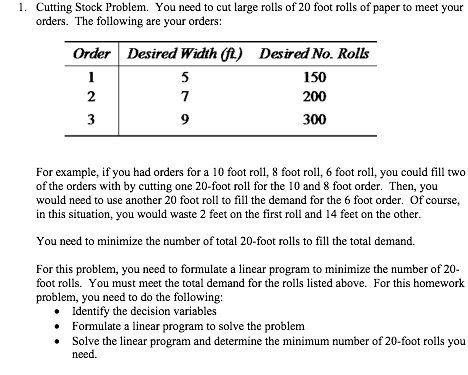

In [11]:
#Create a list of all the widths
Cuts = ["5-5-5-5","9-9","5-5-9","5-7-7","7-9","5-5-7"]

#Create a dictionary of width demand
Demand = {"5":150,
        "7":200,
         "9":300}

# Create the 'prob' variable to contain the problem data
prob = LpProblem("Nurses",LpMinimize)

# Create the Variables , aka cut types
product_vars = LpVariable.dicts("Cuts",Cuts,lowBound=0,upBound=None,cat=LpContinuous)

# The objective function is added to 'prob' first
# We are summing up all roll cut options
prob += lpSum([product_vars[i] for i in Cuts]), "Total Rolls Used"

# Constraints
# For each cut length, it can come from 3 different rolls. Make sure demand is met by adding roll options
prob += lpSum(product_vars["5-5-5-5"]*4 + product_vars["5-5-9"]*2 + product_vars["5-7-7"] + product_vars["5-5-7"]*2) >= Demand["5"] , "5"
prob += lpSum(product_vars["5-7-7"]*2 + product_vars["7-9"] + product_vars["5-5-7"]) >= Demand["7"] , "7"
prob += lpSum(product_vars["9-9"]*2 + product_vars["7-9"] + product_vars["5-5-9"]) >= Demand["9"] , "9"

# The problem data is written to an .lp file
prob.writeLP("Cuts.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Rolls Used = ", value(prob.objective))

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Cuts_5_5_5_5 = 12.5
Cuts_5_5_7 = 0.0
Cuts_5_5_9 = 0.0
Cuts_5_7_7 = 100.0
Cuts_7_9 = 0.0
Cuts_9_9 = 150.0
Total Rolls Used =  262.5
5 0.0
5 -150
7 0.0
7 -200
9 0.0
9 -300


## Question 7
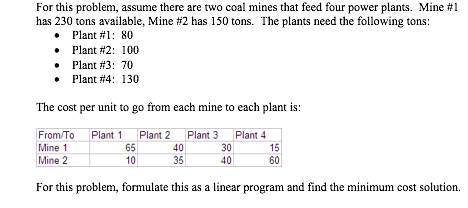

In [12]:
# Create decision variables: how much coal goes from each mine to each power plant
coal = ["M1P1","M1P2","M1P3","M1P4","M2P1","M2P2","M2P3","M2P4"]

# Create dictionary of transportation costs
costs = {"M1P1":65,"M1P2":40,"M1P3":30,"M1P4":15,"M2P1":10,"M2P2":35,"M2P3":40,"M2P4":60}

#Create problem
prob = LpProblem("Coal",LpMinimize)

#Create the variables
coal_vars = LpVariable.dicts("Coal_Supply",coal,lowBound=0,upBound=None,cat=LpContinuous)

#Create objective function: transportation costs
prob += lpSum([coal_vars[i]*costs[i] for i in coal]), "Total Cost"

#Create power plant requirement constraints
prob += coal_vars["M1P1"] + coal_vars["M2P1"] >= 80
prob += coal_vars["M1P2"] + coal_vars["M2P2"] >= 100
prob += coal_vars["M1P3"] + coal_vars["M2P3"] >= 70
prob += coal_vars["M1P4"] + coal_vars["M2P4"] >= 130

#Create coal mine capacity constraints
prob += coal_vars["M1P1"] + coal_vars["M1P2"] + coal_vars["M1P3"] + coal_vars["M1P4"] <= 230
prob += coal_vars["M2P1"] + coal_vars["M2P2"] + coal_vars["M2P3"] + coal_vars["M2P4"] <= 150

#The problem data is writen to a .lp file
prob.writeLP("caol.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])


# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Transportation Cost = ", value(prob.objective))

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Coal_Supply_M1P1 = 0.0
Coal_Supply_M1P2 = 30.0
Coal_Supply_M1P3 = 70.0
Coal_Supply_M1P4 = 130.0
Coal_Supply_M2P1 = 80.0
Coal_Supply_M2P2 = 70.0
Coal_Supply_M2P3 = 0.0
Coal_Supply_M2P4 = 0.0
Total Transportation Cost =  8500.0
None 0.0
None -80
None 0.0
None -100
None 0.0
None -70
None 0.0
None -130
None 0.0
None -230
None 0.0
None -150


## Question 8
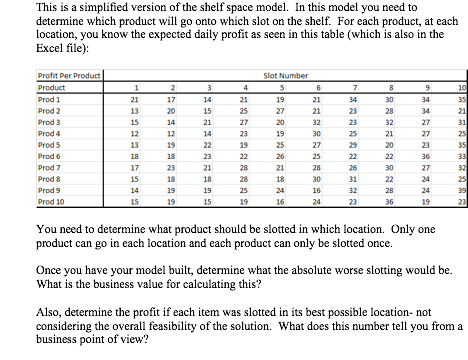

### Optimal

In [13]:
import pandas as pd
import numpy as np
from pulp import *

import math
from math import isnan

ProdPrices = pd.read_csv('Q8.csv').iloc[:,1:]
lift = np.array(ProdPrices)
lift.astype(np.int)
lift

#define the optimization function
prob=LpProblem("ProdSlot",LpMaximize)

#define decision variables
dec_var=LpVariable.matrix("dec_var",(range(len(lift)),range(len(lift[0]))),0,1,LpBinary)

#Compute the sum product of decision variables and lifts
prodt_matrix=[dec_var[i][j]*lift[i][j]
              for i in range(len(lift))
              for j in range(len(lift[0]))]


#total lift which has to be maximized sum(prodt_matrix)
#define the objective function
prob+=lpSum(prodt_matrix)

#DEFINE CONSTRAINTS
#1) Each shelf can have only one product i.e. sum (each row)<=1
for i in range(len(lift)):
    prob+=lpSum(dec_var[i])<=1
    
#2) Each product can be displayed only once i.e. Column constraints
#Constraints are given as
dec_var=np.array(dec_var)
col_data=[]
for j in range(len(lift[0])):
    col_data.append(list(zip(*dec_var))[j])
    prob+=lpSum(col_data[j])<=1

#write the problem

prob.writeLP("ProdSlot.lp")

#solve the problem

prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# print the output
print("The Total profit obtained is:",value(prob.objective)) 

#print the decision variable output matrix

Matrix=[[0 for X in range(len(lift[0]))] for y in range(len(lift))]

for v in prob.variables():

    Matrix[int(v.name.split("_")[2])][int(v.name.split("_")[3])]=v.varValue

    matrix=np.int_(Matrix)

print ("The decision variable matrix is:")
print(matrix)

Status: Optimal
The Total profit obtained is: 284.0
The decision variable matrix is:
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]]


#### Once you have your model built, determine what the absolute worse slotting would be.  What is the business value for calculating this?

In [14]:
a = np.zeros(shape=[10,10], dtype=int)
np.fill_diagonal(a, 1)
print ("The absolute worse slotting decision variable matrix is:")
print(a)
prodt_matrix2=[a[i][j]*lift[i][j]
              for i in range(len(lift))
              for j in range(len(lift[0]))]

# print the output
print("The total profit obtained is:",sum(prodt_matrix2)) 

The absolute worse slotting decision variable matrix is:
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
The total profit obtained is: 221


## Question 9
Simplified Berlin Airlift Model.  

Do the problem in the Berlin Airlift PDF.  Note, that you need to make a few modifications.  

(For some reason, this problem did not do a good job of keeping track of time periods).

You need to modify:
•	Assume that each plane can make 21 trips per week
•	Assume that the total weekly budget is $7,000,000

Instead of the directions they give for solving the problem, do this:
•	Set up the model in Excel (you should at least try this in Excel and if you like try it in Python too) and solve with OpenSolver
•	What if the budget was $5,000,000, what is the solution?  What is wrong with the solution?  What are at least two ways to resolve this problem?

## Question 10
You are working for a distributor of vegetables.  You can see the data on the vegetables in the spreadsheet.  You have the price that you purchase, the price you sell, and the minimum quantity you have to sell (by contract), the max you can sell (the most the market will bear), and the cubic feet per carton.   In your business you receive cases of vegetables from your suppliers at the start of the week.  Your warehouse only has room for 18,000 cubic feet of product.  And, your supplier only allows you to purchase up to $30,000 of product per week.  

#### a.	Set this up and solve as a linear program

In [17]:
import pandas as pd
import numpy as np
Q10 = pd.read_csv("Q10.csv",sep='\t')
Products = list(Q10['Vegtable'])
Q10 = Q10.set_index('Vegtable')
Costs = Q10['Cost'].to_dict()
Prices = Q10['Price'].to_dict()
MinQ = Q10['Min'].to_dict()
MaxQ = Q10['Max'].to_dict()
Cubic = Q10['Cubic Feet Per Carton'].to_dict()

In [22]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("Veg Profit",LpMaximize)

# Create the Variables
product_vars = LpVariable.dicts("Prods",Products,lowBound=0,upBound=None,cat=LpContinuous)

# The objective function is added to 'prob' first
prob += lpSum([Prices[i]*product_vars[i] - Prices[i]*Costs[i] for i in Products]), "Total Profit of Plan"

# We can enter the constraints that relate to limited amount of material
for i in Products:
    prob += product_vars[i] >= MinQ[i]
    prob += product_vars[i] <= MaxQ[i]

# Additional constraints
prob += lpSum([product_vars[i]*1.25 for i in Products]) <= 18000
prob += lpSum([product_vars[i]*Costs[i] for i in Products]) <= 30000

# The problem data is written to an .lp file
prob.writeLP("VegProfit.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Profit of Plan = ", value(prob.objective))

for constraint in prob.constraints:
        # print(prob.constraints[constraint].name, prob.constraints[constraint].value() - prob.constraints[constraint].constant)
        print(prob.constraints[constraint].name, prob.constraints[constraint].value())
        print(prob.constraints[constraint].name, prob.constraints[constraint].constant)

Status: Optimal
Prods_Artichokes = 0.0
Prods_Black_eyd_Peas = 900.0
Prods_Broccoli = 400.0
Prods_Brussel_sprouts = 100.0
Prods_Carrots = 1200.0
Prods_Cauliflower = 100.0
Prods_Creamed_Corn = 2000.0
Prods_Green_Beans = 3200.0
Prods_Green_Peas = 750.0
Prods_Lima_beans = 2150.0
Prods_Okra = 150.0
Prods_Spinach = 400.0
Prods_Squash = 100.0
Prods_Succotash = 200.0
Prods_Whipped_Potatoes = 300.0
Total Profit of Plan =  33274.267
None 0.0
None -300
None -1200.0
None -1500
None 1600.0
None -400
None 0.0
None -2000
None 650.0
None -250
None 0.0
None -900
None 0.0
None 0
None -150.0
None -150
None 900.0
None -300
None 0.0
None -1200
None 0.0
None -200
None -600.0
None -800
None 0.0
None -150
None -450.0
None -600
None 0.0
None -100
None -200.0
None -300
None 0.0
None -750
None -2750.0
None -3500
None 0.0
None -400
None -1600.0
None -2000
None 1650.0
None -500
None -1150.0
None -3300
None 0.0
None -100
None -400.0
None -500
None 2700.0
None -500
None 0.0
None -3200
None 0.0
None -100
None -400.0


In [20]:
product_vars

{'Artichokes': Prods_Artichokes,
 'Black-eyd Peas': Prods_Black_eyd_Peas,
 'Broccoli': Prods_Broccoli,
 'Brussel sprouts': Prods_Brussel_sprouts,
 'Carrots': Prods_Carrots,
 'Cauliflower': Prods_Cauliflower,
 'Creamed Corn': Prods_Creamed_Corn,
 'Green Beans': Prods_Green_Beans,
 'Green Peas': Prods_Green_Peas,
 'Lima beans': Prods_Lima_beans,
 'Okra': Prods_Okra,
 'Spinach': Prods_Spinach,
 'Squash': Prods_Squash,
 'Succotash': Prods_Succotash,
 'Whipped Potatoes': Prods_Whipped_Potatoes}

#### b.	What insights do you get from the solution.